In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%%capture
%pip install tensorflow_datasets -q

In [7]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import layers
import keras

In [8]:
%%capture
from tqdm import tqdm as tqdm
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


In [9]:
 num_classes = metadata.features['label'].num_classes
print(num_classes)

2


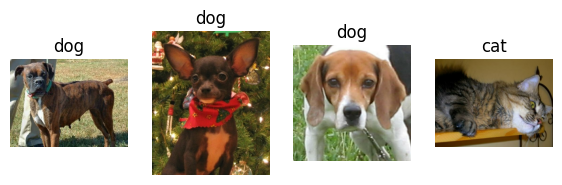

In [10]:
get_label_name = metadata.features['label'].int2str
train_iter = iter(train_ds)
fig = plt.figure(figsize=(7, 8))
for x in range(4):
    image, label = next(train_iter)
    fig.add_subplot(1, 4, x+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(get_label_name(label));


In [11]:
IMG_SIZE = 180
resize_and_rescale = keras.Sequential([
layers.Resizing(IMG_SIZE, IMG_SIZE),
layers.Rescaling(1./255)
])


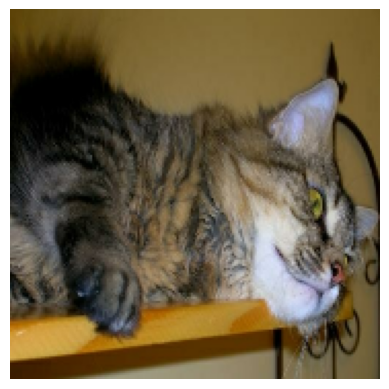

In [12]:
result = resize_and_rescale(image)
plt.axis('off')
plt.imshow(result);


In [13]:
data_augmentation = keras.Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.4),
])


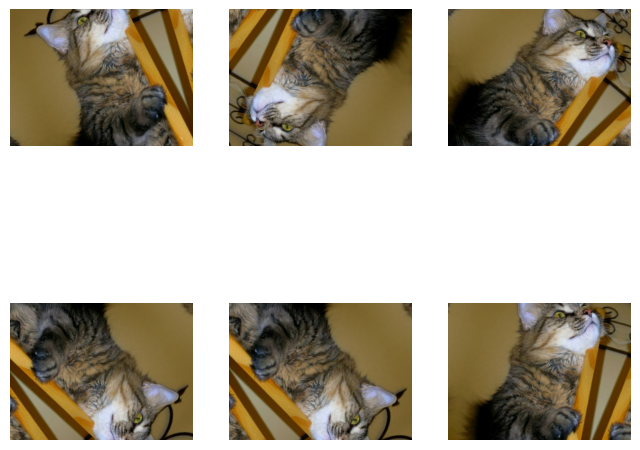

In [14]:
plt.figure(figsize=(8, 7))
for i in range(6):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image.numpy() / 255)
    plt.axis("off")


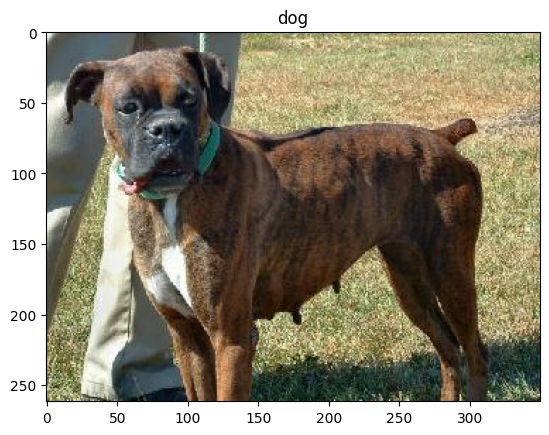

In [15]:
image, label = next(iter(train_ds))
plt.imshow(image)
plt.title(get_label_name(label));

In [16]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    # plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    # plt.axis("off")

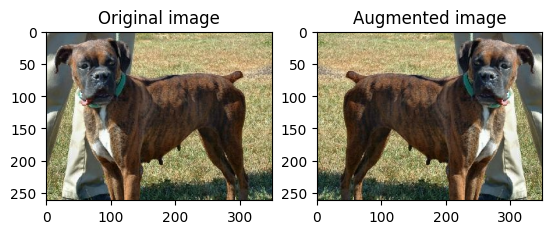

In [17]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

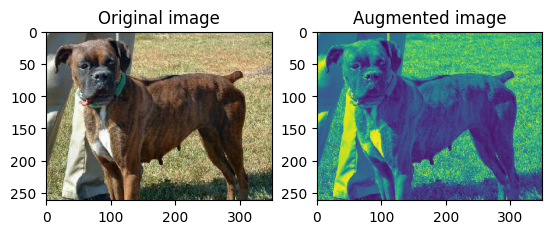

In [18]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
#visualize(image, grayscaled)

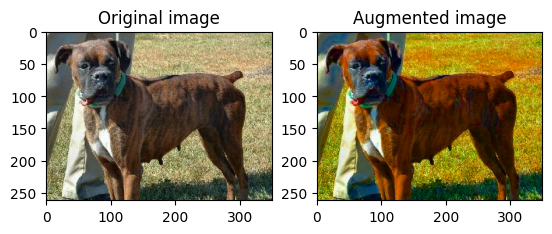

In [19]:
 saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)


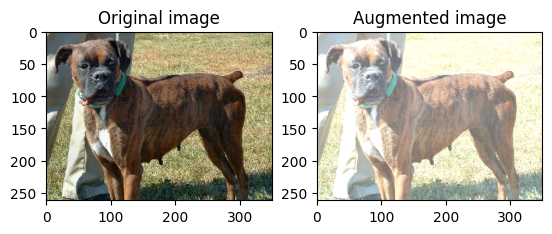

In [20]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)


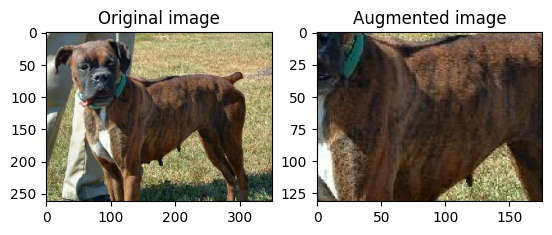

In [21]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

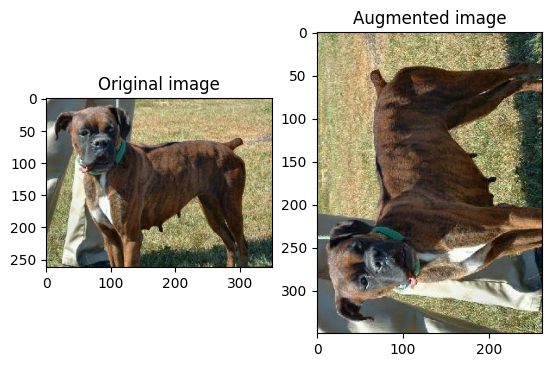

In [22]:
rotated = tf.image.rot90(image) # Rotate anticlockwise by 90 degrees
visualize(image, rotated)